In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4AZ0CP8D,King,Shoreline,WA,98177.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,32.0,125450447,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
1,5YJSA1E45K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,43.0,101662900,POINT (-122.30207 47.64085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
2,WVGUNPE28M,Kitsap,Olalla,WA,98359.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,272118717,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP6H,Thurston,Olympia,WA,98501.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,22.0,349372929,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
4,1FADP5CU9G,Thurston,Olympia,WA,98506.0,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,22.0,171625653,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10


### 7.	Most favorite brand in WA

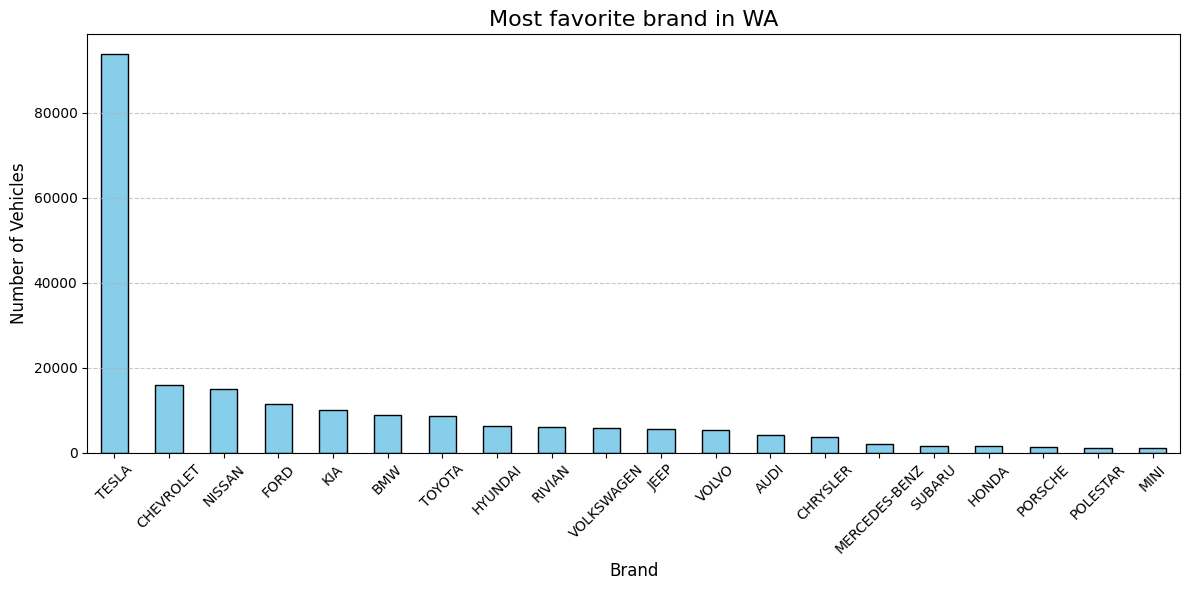

In [17]:
wa_data = data[data['State'] == 'WA']
brand_counts = wa_data['Make'].value_counts().head(20)

plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Most favorite brand in WA', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() 
plt.show()

### 8.	Most favorite brand in each city (WA)

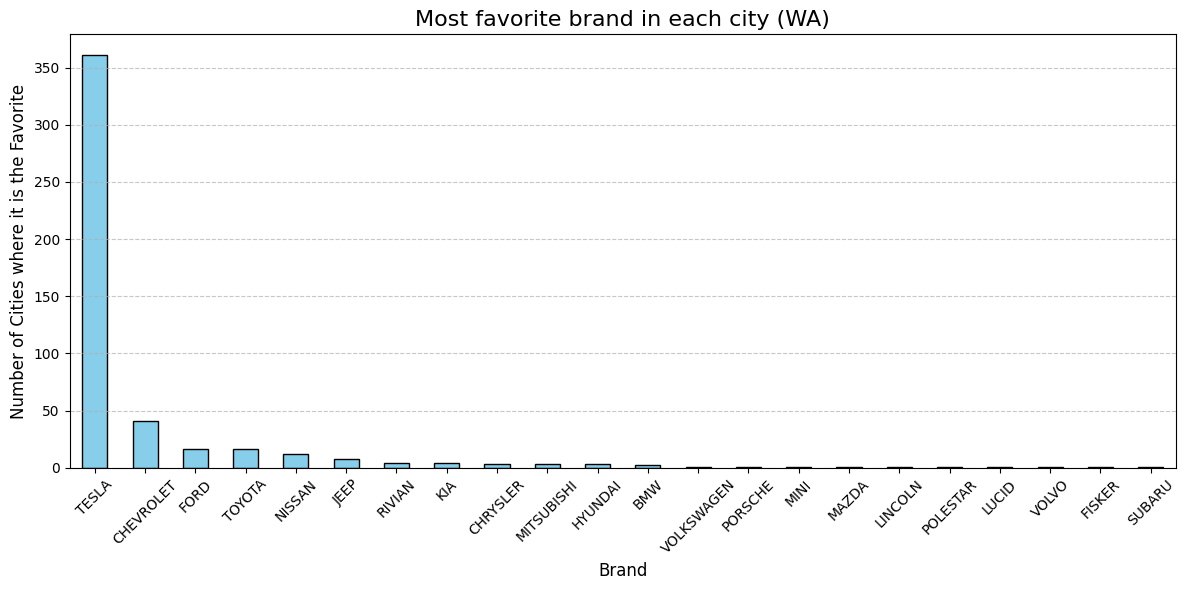

In [5]:
favorite_brand_city = (
    wa_data.groupby('City')['Make']
    .apply(lambda x: x.value_counts().idxmax())
)

brand_ranking_city = favorite_brand_city.value_counts()

plt.figure(figsize=(12, 6))
brand_ranking_city.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Most favorite brand in each city (WA)', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Cities where it is the Favorite', fontsize=12)
plt.xticks(rotation=45, fontsize=10) 

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() 
plt.show()


### 9.	Most favorite brand in each county (WA)

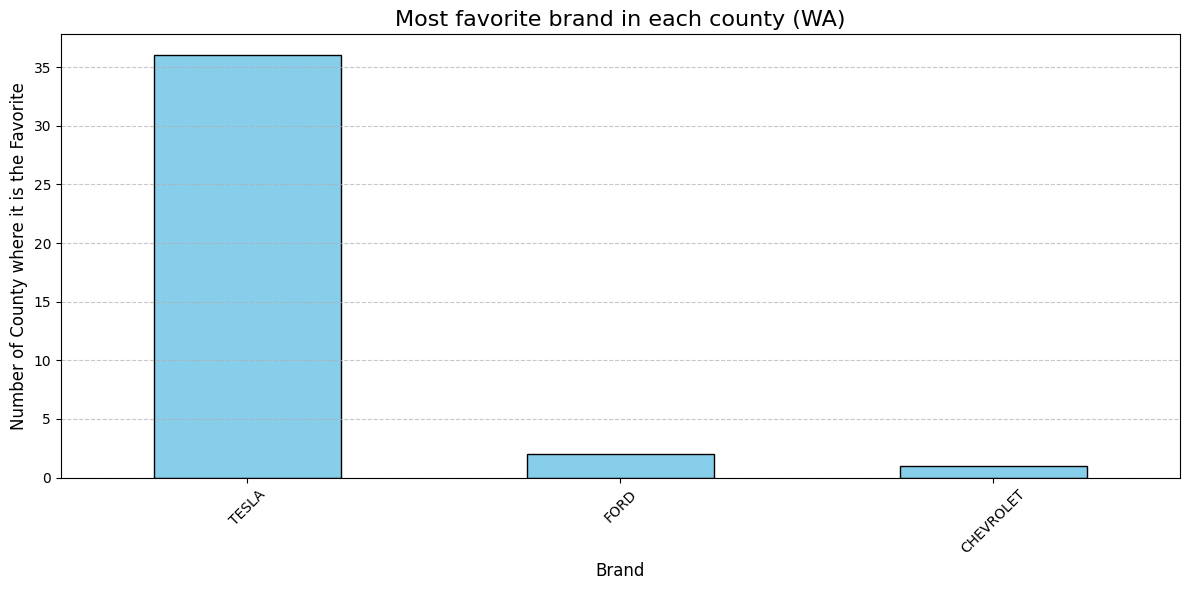

In [18]:
favorite_brand_county = (
    wa_data.groupby('County')['Make']
    .apply(lambda x: x.value_counts().idxmax())
)

brand_ranking_county = favorite_brand_county.value_counts()

plt.figure(figsize=(12, 6))
brand_ranking_county.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Most favorite brand in each county (WA)', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of County where it is the Favorite', fontsize=12)
plt.xticks(rotation=45, fontsize=10) 

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() 
plt.show()

### 15.	Estimate the reduction in CO2 emissions and fuel consumption  (WA)

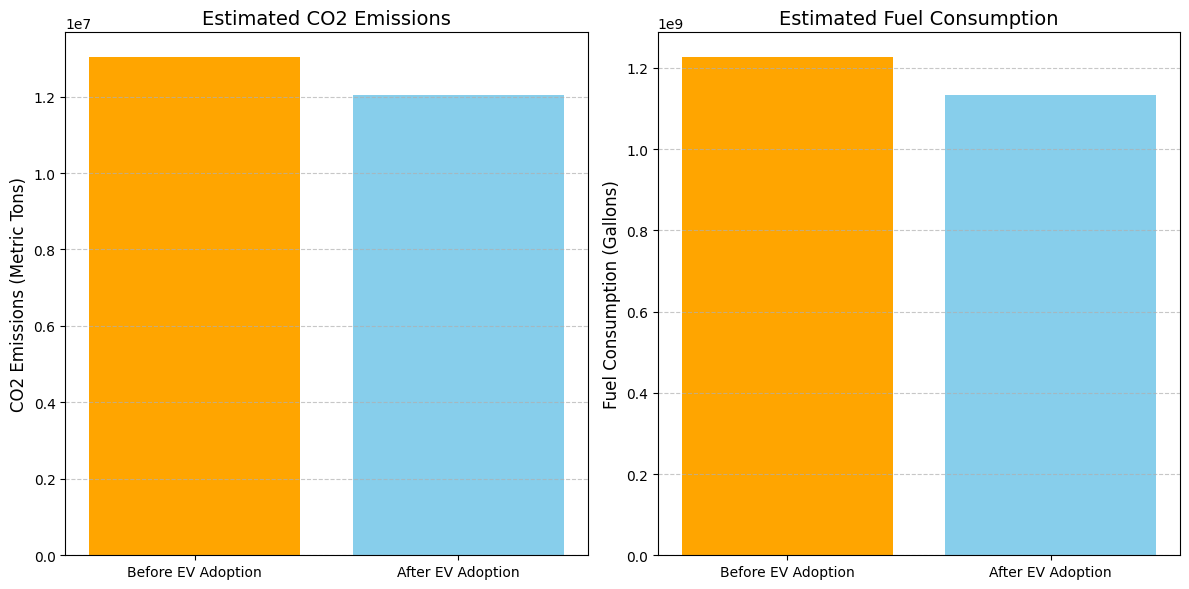

Reduction in co2:  7.652886866684172 %
Reduction in fuel:  7.652886866684172 %


In [ ]:
import pandas as pd

total_evs = data.shape[0]

# Based on internet search 
# https://www.statista.com/statistics/196010/total-number-of-registered-automobiles-in-the-us-by-state/
total_vehicles_wa = 2832552
# https://www.epa.gov/greenvehicles/greenhouse-gas-emissions-typical-passenger-vehicle#:~:text=typical%20passenger%20vehicle%3F-,A%20typical%20passenger%20vehicle%20emits%20about%204.6%20metric%20tons%20of,8%2C887%20grams%20of%20CO2.
average_co2_per_gas_vehicle = 4.6  # Tons/year
# https://afdc.energy.gov/data/10308
average_fuel_per_gas_vehicle = 433  # Gallons/year

ev_proportion = total_evs / total_vehicles_wa

reduction_co2 = ev_proportion * average_co2_per_gas_vehicle * total_vehicles_wa
reduction_fuel = ev_proportion * average_fuel_per_gas_vehicle * total_vehicles_wa


original_co2 = average_co2_per_gas_vehicle * total_vehicles_wa
original_fuel = average_fuel_per_gas_vehicle * total_vehicles_wa


post_co2 = original_co2 - reduction_co2
post_fuel = original_fuel - reduction_fuel

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# CO2 Emissions
axs[0].bar(['Before EV Adoption', 'After EV Adoption'], [original_co2, post_co2], color=['orange', 'skyblue'])
axs[0].set_title('Estimated CO2 Emissions', fontsize=14)
axs[0].set_ylabel('CO2 Emissions (Metric Tons)', fontsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Fuel Consumption
axs[1].bar(['Before EV Adoption', 'After EV Adoption'], [original_fuel, post_fuel], color=['orange', 'skyblue'])
axs[1].set_title('Estimated Fuel Consumption', fontsize=14)
axs[1].set_ylabel('Fuel Consumption (Gallons)', fontsize=12)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("Reduction in co2: ", (1-(post_co2/original_co2))*100, "%")
print("Reduction in fuel: ", (1-(post_fuel/original_fuel))*100, "%")